## Search Based Problem Solving

#### 我们根据中国的城市，做一个简易版的导航地图

## 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

## 解决办法

1. 下载附件中的字体； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

In [2]:
import matplotlib
print(matplotlib.__path__)

['/Users/gaominquan/anaconda3/lib/python3.7/site-packages/matplotlib']


In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import networkx as nx

In [3]:
import re

In [4]:
city_location = {}


In [5]:
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    # python re referenes: https://docs.python.org/3/library/re.html
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [6]:
import math

In [7]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [8]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [9]:
get_city_distance('杭州', '上海')

153.5185697155768

In [10]:
import networkx as nx

In [11]:
cities = list(city_location.keys())

In [12]:
city_graph = nx.Graph()

In [13]:
city_graph.add_nodes_from(cities)

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


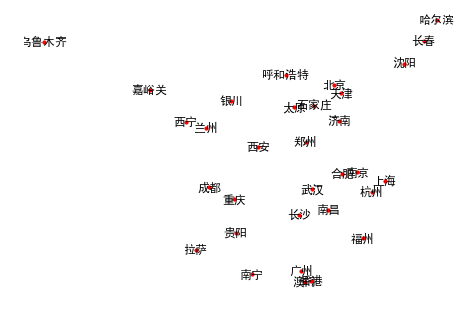

In [17]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [19]:
threshold = 700

In [20]:
from collections import defaultdict

In [21]:
cities_connection = defaultdict(list)

In [22]:
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
        
        if get_city_distance(c1, c2) < threshold: 
            cities_connection[c1].append(c2)

In [23]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [24]:
cities_connection_graph = nx.Graph(cities_connection)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


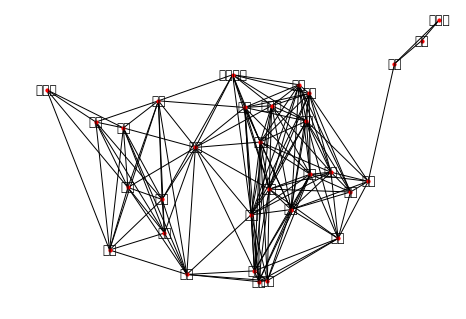

In [25]:
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [26]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [36]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
#        print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [40]:
search(cities_connection, start='西安', is_goal=is_goal('上海'), search_strategy=lambda n: n)

['西安', '石家庄', '济南', '上海']

In [34]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [42]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=lambda n: n)

['北京', '长沙', '南宁', '拉萨']

## Machine Learning, the first step

In [43]:
from sklearn.datasets import load_boston

In [44]:
dataset = load_boston()

In [47]:
X, y = dataset['data'], dataset['target']

In [49]:
X.shape

(506, 13)

In [50]:
y.shape

(506,)

In [51]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [56]:
X[:, 0].shape

(506,)

In [55]:
y.shape

(506,)

In [70]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

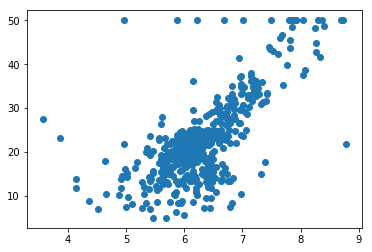

In [74]:
plt.scatter(X[:, 5], y)

In [75]:
room_num = X[:, 5]

In [76]:
price = y

In [78]:
import random

In [80]:
import numpy as np

loop == 10000
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 46.079448912805375
loop == 9999
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 42.02978597453693
loop == 9998
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 37.98012303626847
loop == 9997
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 33.93046009800003
loop == 9996
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 29.88079715973159
loop == 9995
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 25.831134221463138
loop == 9994
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 21.781471283194694
loop == 9993
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 17.734310176166385
loop == 9992
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 13.82619386684141
loop == 9991
f(age) = -5.747019451634157 * age + 8.521610543556434, 

loop == 9807
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.844245888138075
loop == 9806
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.843981847915217
loop == 9805
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.843725898057102
loop == 9804
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.843473093720494
loop == 9803
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.843209053497635
loop == 9802
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.842945013274775
loop == 9801
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.842699690397243
loop == 9800
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.842436259080053
loop == 9799
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.842172218857193
loop == 9798
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 9593
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.789218636784212
loop == 9592
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.788954227841329
loop == 9591
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.7887052417415505
loop == 9590
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.788450917747436
loop == 9589
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.788186508804553
loop == 9588
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.787942038667374
loop == 9587
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.78768319871066
loop == 9586
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.787418789767778
loop == 9585
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.7871788355931955
loop == 9584
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 9430
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.74786371830008
loop == 9429
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.747603445847
loop == 9428
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.7473539716355475
loop == 9427
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.747099486274908
loop == 9426
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.746844224971016
loop == 9425
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.7465955267028175
loop == 9424
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.746334478306484
loop == 9423
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.746098403185449
loop == 9422
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.745864884063487
loop == 9421
f(age) = -5.747019451634157 * age + 8.521610543556434, with er

loop == 9289
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.714159884745804
loop == 9288
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.713926869653787
loop == 9287
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.713693854561768
loop == 9286
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.71346083946975
loop == 9285
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.713227824377731
loop == 9284
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.712994809285713
loop == 9283
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.712761794193695
loop == 9282
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.712528779101677
loop == 9281
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.712295764009659
loop == 9280
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 9142
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.680331469012508
loop == 9141
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.680102893530544
loop == 9140
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.679874318048581
loop == 9139
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.679645742566617
loop == 9138
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.679417167084654
loop == 9137
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.679188591602691
loop == 9136
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.678960016120727
loop == 9135
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.678731440638764
loop == 9134
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.678503011066828
loop == 9133
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 9003
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.648948584989447
loop == 9002
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.648735223313163
loop == 9001
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.648509425828043
loop == 9000
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.6482836283429245
loop == 8999
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.648057830857805
loop == 8998
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.647832033372685
loop == 8997
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.647606235887567
loop == 8996
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.647380438402448
loop == 8995
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.647154640917328
loop == 8994
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 8860
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.617067273953108
loop == 8859
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.616967119290326
loop == 8858
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.616713771352143
loop == 8857
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.616590838677444
loop == 8856
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.616199314373437
loop == 8855
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.616214558064561
loop == 8854
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.615732389476375
loop == 8853
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.615521862807422
loop == 8852
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.615413602133754
loop == 8851
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 8730
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.588754538303977
loop == 8729
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.58852916597782
loop == 8728
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.588314859977605
loop == 8727
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.588102090118176
loop == 8726
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.587876717792018
loop == 8725
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.5876774087978305
loop == 8724
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.587526392880368
loop == 8723
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.587313056360673
loop == 8722
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.587023092772881
loop == 8721
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 8585
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.557385023123803
loop == 8584
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.557178229709511
loop == 8583
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.556997440914862
loop == 8582
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.556756420426442
loop == 8581
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.556564929436788
loop == 8580
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.556334611143373
loop == 8579
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.556132417958714
loop == 8578
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.555912801860303
loop == 8577
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.5556999064806405
loop == 8576
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 8423
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.523111303767379
loop == 8422
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.522887278151841
loop == 8421
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.522690539734865
loop == 8420
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.522467844517508
loop == 8419
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.52226682178114
loop == 8418
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.522048410883174
loop == 8417
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.521843103827415
loop == 8416
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.521628977248843
loop == 8415
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.521419385873688
loop == 8414
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 8276
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.4921255348618345
loop == 8275
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.491923638693605
loop == 8274
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.491706101227501
loop == 8273
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.491499920739879
loop == 8272
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.491286667593169
loop == 8271
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.491076202786155
loop == 8270
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.490867233958836
loop == 8269
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.490652484832428
loop == 8268
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.490447800324503
loop == 8267
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 8151
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.465834017702807
loop == 8150
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.465623583894799
loop == 8149
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.465409198458639
loop == 8148
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.465209813340659
loop == 8147
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.4649925520957545
loop == 8146
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.464787869905232
loop == 8145
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.464578781541615
loop == 8144
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.4643630506610625
loop == 8143
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.4641650109874735
loop == 8142
f(age) = -5.747019451634157 * age + 8.521610543556434, wi

loop == 8016
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.437643021106754
loop == 8015
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.437425759861851
loop == 8014
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.437223733940809
loop == 8013
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.437014705260935
loop == 8012
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.436799500315068
loop == 8011
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.43660365066002
loop == 8010
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.436386389415117
loop == 8009
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.436181473333316
loop == 8008
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.435975334814201
loop == 8007
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 7881
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.409682070628454
loop == 7880
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.4094869212870655
loop == 7879
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.409282220688601
loop == 7878
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.409075426312419
loop == 7877
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.408868631936238
loop == 7876
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.408673025885638
loop == 7875
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.408468781996386
loop == 7874
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.408261987620204
loop == 7873
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.4080551932440235
loop == 7872
f(age) = -5.747019451634157 * age + 8.521610543556434, wit

loop == 7752
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.383595500320692
loop == 7751
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.3834052248460615
loop == 7750
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.38323481613175
loop == 7749
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.382973010787812
loop == 7748
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.382806883454315
loop == 7747
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.382590692992659
loop == 7746
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.382378950776879
loop == 7745
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.382212539477599
loop == 7744
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.382018266587936
loop == 7743
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 7605
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.354196355156651
loop == 7604
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.353994669658908
loop == 7603
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.353792984161166
loop == 7602
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.353591298663424
loop == 7601
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.35340296128202
loop == 7600
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.353209527769957
loop == 7599
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.353037509269858
loop == 7598
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.352873962599434
loop == 7597
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.352601676605198
loop == 7596
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 7465
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.3269297802112865
loop == 7464
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.326738280238179
loop == 7463
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.3265623376402385
loop == 7462
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.326355496661651
loop == 7461
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.326173779435143
loop == 7460
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.325972713085123
loop == 7459
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.325785221230047
loop == 7458
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.325589929508595
loop == 7457
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.325396663024951
loop == 7456
f(age) = -5.747019451634157 * age + 8.521610543556434, wit

loop == 7315
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.299993401492259
loop == 7314
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.299838317511146
loop == 7313
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.299708396466547
loop == 7312
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.299529023536512
loop == 7311
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.2994321339136246
loop == 7310
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.299135917204157
loop == 7309
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.2990520655888576
loop == 7308
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.298825368921885
loop == 7307
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.29867199726409
loop == 7306
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 7165
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.274756426876939
loop == 7164
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.27458592662502
loop == 7163
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.274415426373103
loop == 7162
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.274257062035029
loop == 7161
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.274086686430282
loop == 7160
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.273916186178365
loop == 7159
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.273745685926448
loop == 7158
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.27358032636114
loop == 7157
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.273416945983627
loop == 7156
f(age) = -5.747019451634157 * age + 8.521610543556434, with er

loop == 6927
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.234988955808256
loop == 6926
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.234822620773731
loop == 6925
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.234661369242345
loop == 6924
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.234519608532823
loop == 6923
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.234397279275309
loop == 6922
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.234189176442504
loop == 6921
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.233998064053973
loop == 6920
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.233831729019446
loop == 6919
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.23366539398492
loop == 6918
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 6730
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.203041338581738
loop == 6729
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.20298287747514
loop == 6728
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.202710111316821
loop == 6727
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.202678370040249
loop == 6726
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.202386053024805
loop == 6725
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.2022670178561805
loop == 6724
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.2021620665848305
loop == 6723
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.201962510421288
loop == 6722
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.201830839319914
loop == 6721
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 6583
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.1798515945156165
loop == 6582
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.179694065642723
loop == 6581
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.17953653676983
loop == 6580
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.179379007896937
loop == 6579
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.179225114127663
loop == 6578
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.179106060178635
loop == 6577
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.179069763206835
loop == 6576
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.178781285742202
loop == 6575
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.1785993922667135
loop == 6574
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 6455
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.160144812102896
loop == 6454
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.16000010155902
loop == 6453
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.159843863901425
loop == 6452
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.159687626243829
loop == 6451
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.15953514862979
loop == 6450
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.159390029435569
loop == 6449
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.159233791777973
loop == 6448
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.159077554120378
loop == 6447
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.158925485156685
loop == 6446
f(age) = -5.747019451634157 * age + 8.521610543556434, with er

loop == 6308
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.137913964250495
loop == 6307
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.137767253649596
loop == 6306
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.137610740102673
loop == 6305
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.137464022773906
loop == 6304
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.137317389144213
loop == 6303
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.13716087559729
loop == 6302
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.137014081297316
loop == 6301
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.136867524638831
loop == 6300
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.136711011091909
loop == 6299
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 6157
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.115526999481065
loop == 6156
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.1153993579338355
loop == 6155
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.115233759388265
loop == 6154
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.115072472381359
loop == 6153
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.114939366364341
loop == 6152
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.114786885384714
loop == 6151
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.114652884394124
loop == 6150
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.11450525391492
loop == 6149
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.114362446897053
loop == 6148
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 5997
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.092858367553593
loop == 5996
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.092711197120918
loop == 5995
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.092574331919884
loop == 5994
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.092437246687386
loop == 5993
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.092290076254712
loop == 5992
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.09215527697175
loop == 5991
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.092016125821179
loop == 5990
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.091868955388506
loop == 5989
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.091736222023619
loop == 5988
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 5842
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.07200769342207
loop == 5841
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.071876620438193
loop == 5840
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.071745547454316
loop == 5839
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.071614474470439
loop == 5838
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.071483401486561
loop == 5837
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.071352328502684
loop == 5836
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.0712212555188065
loop == 5835
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.071090182534929
loop == 5834
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.070959109551052
loop == 5833
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 5716
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.0558560388911
loop == 5715
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.0557439875155055
loop == 5714
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.055591876321391
loop == 5713
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.055464161327795
loop == 5712
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.055336446334201
loop == 5711
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.055213014777296
loop == 5710
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.055110792578081
loop == 5709
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.054971362865066
loop == 5708
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.0548421097545715
loop == 5707
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.039621380910215
loop == 5586
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.039494606437484
loop == 5585
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.039373217725319
loop == 5584
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.039252387065131
loop == 5583
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.03913997407599
loop == 5582
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.038997850840614
loop == 5581
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.038871076367884
loop == 5580
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.0387443018951545
loop == 5579
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.038623792515583
loop == 5578
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5

loop == 5443
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.021719436785455
loop == 5442
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.021592890721228
loop == 5441
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.021473581499557
loop == 5440
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.021354141261778
loop == 5439
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.021227595197553
loop == 5438
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.021101049133328
loop == 5437
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.020978995785048
loop == 5436
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.020862299673877
loop == 5435
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.020735753609651
loop == 5434
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 5312
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.005639401987692
loop == 5311
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.005520539287179
loop == 5310
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.005421720963899
loop == 5309
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.005324310420277
loop == 5308
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.005243720990896
loop == 5307
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.005141160522606
loop == 5306
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.004948525867117
loop == 5305
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.004818234756699
loop == 5304
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 5.004780424678659
loop == 5303
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 5172
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.988843621799538
loop == 5171
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.9885149521948176
loop == 5170
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.988426935050838
loop == 5169
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.988481556648153
loop == 5168
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.988152488736164
loop == 5167
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.988067862573138
loop == 5166
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.988119491496768
loop == 5165
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.987790025277509
loop == 5164
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.98770879009544
loop == 5163
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 5019
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.970330209995885
loop == 5018
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.970213291455571
loop == 5017
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.97009742623735
loop == 5016
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.969969422171907
loop == 5015
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.969863071371285
loop == 5014
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.969736638413373
loop == 5013
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.96961763098009
loop == 5012
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.96950385465484
loop == 5011
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.969375850589395
loop == 5010
f(age) = -5.747019451634157 * age + 8.521610543556434, with err

loop == 4870
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.953151974044631
loop == 4869
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.952985893654282
loop == 4868
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.952855455082797
loop == 4867
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.952753679575011
loop == 4866
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.952631653671713
loop == 4865
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.952593996802199
loop == 4864
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.95241550297025
loop == 4863
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.952353085576434
loop == 4862
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.952199352268786
loop == 4861
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 4725
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936973398301437
loop == 4724
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936741817510603
loop == 4723
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.93682935009323
loop == 4722
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936654800673127
loop == 4721
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936478251840002
loop == 4720
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936354679924482
loop == 4719
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936326404421671
loop == 4718
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936054559175838
loop == 4717
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.936194438694052
loop == 4716
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 4575
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.920642974659088
loop == 4574
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.920487893186384
loop == 4573
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.9203965517544965
loop == 4572
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.920312750754366
loop == 4571
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.9203227768884625
loop == 4570
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.919991792445978
loop == 4569
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.919879638371454
loop == 4568
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.919784009758387
loop == 4567
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.919679061233083
loop == 4566
f(age) = -5.747019451634157 * age + 8.521610543556434, wit

loop == 4445
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.90725886684948
loop == 4444
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.907132513657619
loop == 4443
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.907062602628823
loop == 4442
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.906923014782462
loop == 4441
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.906866338408167
loop == 4440
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.906713515907303
loop == 4439
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.90667007418751
loop == 4438
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.906515641747931
loop == 4437
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.906462185251067
loop == 4436
f(age) = -5.747019451634157 * age + 8.521610543556434, with er

loop == 4300
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.8926586910312775
loop == 4299
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.892558342889219
loop == 4298
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.892457994747161
loop == 4297
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.892364582009065
loop == 4296
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.892264847731898
loop == 4295
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.892164499589839
loop == 4294
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.892064151447782
loop == 4293
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.891963803305723
loop == 4292
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.891863455163665
loop == 4291
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 4152
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.878330913932516
loop == 4151
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.878271511306802
loop == 4150
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.878117550401607
loop == 4149
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.878112466298868
loop == 4148
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.878008965788506
loop == 4147
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.877854954760847
loop == 4146
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.877795602257596
loop == 4145
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.877688864713354
loop == 4144
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.877582238726687
loop == 4143
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 3978
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.8623475122966076
loop == 3977
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.862271419592771
loop == 3976
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.862166679196499
loop == 3975
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.862089908820923
loop == 3974
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.86198638153289
loop == 3973
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.861907862612578
loop == 3972
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.861806083869279
loop == 3971
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.861725816404233
loop == 3970
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.861625786205669
loop == 3969
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 3818
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847861377138974
loop == 3817
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847778704505904
loop == 3816
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847681079475364
loop == 3815
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847596658297559
loop == 3814
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847501812267754
loop == 3813
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847447260322274
loop == 3812
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847340771381266
loop == 3811
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847234282440257
loop == 3810
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.847143595864591
loop == 3809
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 3659
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.833529938394231
loop == 3658
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.833438202301135
loop == 3657
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.833349890714999
loop == 3656
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.8332578726521795
loop == 3655
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.833169843035766
loop == 3654
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.833077543003223
loop == 3653
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.832989795356533
loop == 3652
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.832897213354268
loop == 3651
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.8328097476773015
loop == 3650
f(age) = -5.747019451634157 * age + 8.521610543556434, wit

loop == 3528
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821862873472869
loop == 3527
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821718464472765
loop == 3526
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.8216185360556
loop == 3525
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821536852095599
loop == 3524
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821444838271695
loop == 3523
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821355239718433
loop == 3522
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821271955906589
loop == 3521
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821240639910101
loop == 3520
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.821099515806758
loop == 3519
f(age) = -5.747019451634157 * age + 8.521610543556434, with er

loop == 3369
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.8078008745877465
loop == 3368
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.807691841104564
loop == 3367
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.807629128159244
loop == 3366
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.807547469817894
loop == 3365
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.807482080651862
loop == 3364
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.807357081730882
loop == 3363
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.807250732216073
loop == 3362
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.8071732699715986
loop == 3361
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.807095142781406
loop == 3360
f(age) = -5.747019451634157 * age + 8.521610543556434, wit

loop == 3219
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794913888625921
loop == 3218
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794824660623218
loop == 3217
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794751461163637
loop == 3216
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794663669547744
loop == 3215
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.79457444154504
loop == 3214
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794488443036888
loop == 3213
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794413450469567
loop == 3212
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794324222466865
loop == 3211
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.794234994464161
loop == 3210
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 3088
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.783983604301005
loop == 3087
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.783906013586809
loop == 3086
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.783828422872613
loop == 3085
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.783750832158417
loop == 3084
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7836732414442205
loop == 3083
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.783595650730023
loop == 3082
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.78351906477105
loop == 3081
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.783459242536125
loop == 3080
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7833621689473835
loop == 3079
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 2957
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.773895222411631
loop == 2956
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.773820597773768
loop == 2955
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.773728337070507
loop == 2954
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.773681954385156
loop == 2953
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.773643936438825
loop == 2952
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.77355629740725
loop == 2951
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.773577741583414
loop == 2950
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.77335178222361
loop == 2949
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.773290186169071
loop == 2948
f(age) = -5.747019451634157 * age + 8.521610543556434, with er

loop == 2830
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.764754289534599
loop == 2829
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.764693902002281
loop == 2828
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.764642385618743
loop == 2827
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7645463409121405
loop == 2826
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.764474354524972
loop == 2825
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.764434436996284
loop == 2824
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.76433839228968
loop == 2823
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7642548070476645
loop == 2822
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.764226488373824
loop == 2821
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 2683
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.754390988766348
loop == 2682
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.754334501876874
loop == 2681
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.754255167892201
loop == 2680
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.754184759206833
loop == 2679
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.754120741481071
loop == 2678
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.754041407496397
loop == 2677
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.753978529647318
loop == 2676
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.753906981085268
loop == 2675
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.753827647100594
loop == 2674
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 2523
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.743150650248592
loop == 2522
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.743071316263919
loop == 2521
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.74300887887165
loop == 2520
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.742936889852789
loop == 2519
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7428577417385895
loop == 2518
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.742802463441659
loop == 2517
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.742723129456985
loop == 2516
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.742651512179075
loop == 2515
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.742588703045854
loop == 2514
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 2385
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.733457429714764
loop == 2384
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.73337809573009
loop == 2383
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.733309166878654
loop == 2382
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.733242530983727
loop == 2381
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.733165036755546
loop == 2380
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.733106966237362
loop == 2379
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.733027632252688
loop == 2378
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.732965755164025
loop == 2377
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.732916309064544
loop == 2376
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 2251
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7241204687647445
loop == 2250
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.724056991793512
loop == 2249
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7239850427230055
loop == 2248
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7239483278767205
loop == 2247
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.723860428515302
loop == 2246
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.723772529153884
loop == 2245
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.723729882725194
loop == 2244
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.723663865237091
loop == 2243
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.723575965875674
loop == 2242
f(age) = -5.747019451634157 * age + 8.521610543556434, wi

loop == 2104
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.714016756881148
loop == 2103
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713962977097536
loop == 2102
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713882282528323
loop == 2101
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713822644581014
loop == 2100
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713747808175498
loop == 2099
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713682312064493
loop == 2098
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713613333822672
loop == 2097
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713541979547972
loop == 2096
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.713478859469847
loop == 2095
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 1944
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.703051552356789
loop == 1943
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.702984639220051
loop == 1942
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.7029170780039635
loop == 1941
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.702844306703531
loop == 1940
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.702782603651138
loop == 1939
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.70270397418701
loop == 1938
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.702648129298313
loop == 1937
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.702566088100591
loop == 1936
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.702511208515386
loop == 1935
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 1805
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.693514492817987
loop == 1804
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.693460699403301
loop == 1803
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.693378658205579
loop == 1802
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.693321727146362
loop == 1801
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.693244183852753
loop == 1800
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.693181394629841
loop == 1799
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.693109709499928
loop == 1798
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.69304106211332
loop == 1797
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.692975235147102
loop == 1796
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 1691
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.685763137860005
loop == 1690
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.685695368777802
loop == 1689
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.685627126047604
loop == 1688
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.685560452433225
loop == 1687
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.685491114235202
loop == 1686
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6854255360886485
loop == 1685
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6853551024228
loop == 1684
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.685290619744072
loop == 1683
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6852190906104
loop == 1682
f(age) = -5.747019451634157 * age + 8.521610543556434, with err

loop == 1554
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.676507288328999
loop == 1553
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6764421639461835
loop == 1552
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.676374102075504
loop == 1551
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.676305601576829
loop == 1550
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.676240915822008
loop == 1549
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.676169039207474
loop == 1548
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.676107729568512
loop == 1547
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.676032476838121
loop == 1546
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.675974543315017
loop == 1545
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 1408
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666763548868263
loop == 1407
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666682718440681
loop == 1406
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666705359233212
loop == 1405
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6665347775973425
loop == 1404
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666456985858277
loop == 1403
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666443872061487
loop == 1402
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666333806466315
loop == 1401
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666299705042786
loop == 1400
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.666213299763229
loop == 1399
f(age) = -5.747019451634157 * age + 8.521610543556434, with

loop == 1187
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.652287832187939
loop == 1186
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.652196467935033
loop == 1185
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.652088921496598
loop == 1184
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.652033823678755
loop == 1183
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.651997306140823
loop == 1182
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.651965155095432
loop == 1181
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.651816740368228
loop == 1180
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.651743148285475
loop == 1179
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.651684903914759
loop == 1178
f(age) = -5.747019451634157 * age + 8.521610543556434, with 

loop == 1013
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6413612898248395
loop == 1012
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.641258425966901
loop == 1011
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.641201228005409
loop == 1010
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.64119608293437
loop == 1009
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.64114552262023
loop == 1008
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.641040519329676
loop == 1007
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.640979379748441
loop == 1006
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.640935602556254
loop == 1005
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.640838823532477
loop == 1004
f(age) = -5.747019451634157 * age + 8.521610543556434, with e

loop == 888
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.634041911331594
loop == 887
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.633987183936741
loop == 886
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6339309260663635
loop == 885
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.633874668195986
loop == 884
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.633818410325608
loop == 883
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.63376215245523
loop == 882
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.633708503559251
loop == 881
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.633658091735644
loop == 880
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.633601833865266
loop == 879
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate

loop == 740
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.626085703732692
loop == 739
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.626044153872835
loop == 738
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.625961600712732
loop == 737
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.625941602014574
loop == 736
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.625876428758007
loop == 735
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.625801058247342
loop == 734
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.625751743006003
loop == 733
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6257262161727395
loop == 732
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.625666571051278
loop == 731
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rat

loop == 597
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618539783505483
loop == 596
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618518876506766
loop == 595
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618491420581519
loop == 594
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.61835297903231
loop == 593
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618296221310349
loop == 592
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618242075263967
loop == 591
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618206160765619
loop == 590
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618266732670053
loop == 589
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.618083439487481
loop == 588
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate:

loop == 446
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610702455967084
loop == 445
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610774738054841
loop == 444
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610565164353877
loop == 443
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610544666189475
loop == 442
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610622033924563
loop == 441
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610412460223599
loop == 440
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610386876411866
loop == 439
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.610469329794284
loop == 438
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6102597560933205
loop == 437
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rat

loop == 308
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603706186109087
loop == 307
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603619258880442
loop == 306
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603582365700115
loop == 305
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603520962918865
loop == 304
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603499085350924
loop == 303
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603452928751795
loop == 302
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603391525970546
loop == 301
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.603330123189296
loop == 300
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.6032736835094
loop == 299
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 

loop == 207
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.598704976679389
loop == 206
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.598653367702135
loop == 205
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.59860697606936
loop == 204
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.598562938721055
loop == 203
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.598511329743801
loop == 202
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.598467933280456
loop == 201
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.598420900762721
loop == 200
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.598369291785468
loop == 199
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.59832889049155
loop == 198
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 

loop == 89
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593481253657281
loop == 88
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593415361137503
loop == 87
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593346733052656
loop == 86
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593286936965902
loop == 85
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593301576047883
loop == 84
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593242179886429
loop == 83
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593169765768367
loop == 82
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593113755714828
loop == 81
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593121898438484
loop == 80
f(age) = -5.747019451634157 * age + 8.521610543556434, with error rate: 4.593068

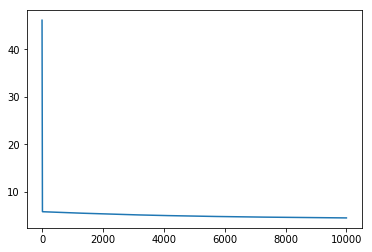

In [81]:
def func(age, k, b): return k * age + b


def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y - yhat))
    # return np.mean(np.square(y - yhat))
    # return np.mean(np.sqrt(y - yhat))


min_error_rate = float('inf')

loop_times = 10000

losses = []

change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

best_k, best_b = k_hat, b_hat

best_direction = None


def step(): return random.random() * 1


direction = random.choice(change_directions)


def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])


learing_rate = 1e-1


while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(price, func(room_num, k_hat, b_hat), room_num)
    b_delta = -1 * learing_rate * derivate_b(price, func(room_num, k_hat, b_hat))

    # k_delta_direction, b_delta_direction = direction
    #
    # k_delta = k_delta_direction * step()
    # b_delta = b_delta_direction * step()
    #
    # new_k = best_k + k_delta
    # new_b = best_b + b_delta

    k_hat += k_delta
    b_hat += b_delta

    estimated_price = func(room_num, k_hat, b_hat)
    error_rate = loss(y=price, yhat=estimated_price)

    # if error_rate < min_error_rate:
    #     min_error_rate = error_rate
    #     best_k, best_b = new_k, new_b
        # best_k, best_b = k_hat, b_hat

        # direction = (k_delta_direction, b_delta_direction)

        # print(min_error_rate)
    print('loop == {}'.format(loop_times))
        # losses.append(min_error_rate)
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    # else:
    #     direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))

    losses.append(error_rate)

    loop_times -= 1


# plt.scatter(sub_age, sub_fare)
# plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')
# plt.plot(sub_age, func(sub_age, k_hat, b_hat), c='r')
# plt.show()

plt.plot(range(len(losses)), losses)
plt.show()